In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import QuantileTransformer , PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from keras.layers import Dense , LSTM
from keras.models import Sequential
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
cmap = cm.get_cmap('Spectral') # Colour map (there are many others)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

import pickle

In [2]:
train_file = "train_FD001.txt"
test_file = "test_FD001.txt"
RUL_file = "RUL_FD001.txt"

df = pd.read_csv(train_file,sep=" ",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392.0,2388.0,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392.0,2388.0,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390.0,2388.0,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392.0,2388.0,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393.0,2388.0,100.0,38.90,23.4044,NaN,NaN


In [3]:
#columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
#           'Nc','epr','Ps3 0','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]
#delete NaN values
df.drop(columns=[26,27],inplace=True)
columns = ["Section-{}".format(i)  for i in range(26)]
df.columns = columns
df.head()

,Section-0,Section-1,Section-2,Section-3,Section-4,Section-5,Section-6,Section-7,Section-8,Section-9,...,Section-16,Section-17,Section-18,Section-19,Section-20,Section-21,Section-22,Section-23,Section-24,Section-25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392.0,2388.0,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392.0,2388.0,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390.0,2388.0,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392.0,2388.0,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393.0,2388.0,100.0,38.90,23.4044


In [4]:
df.describe()

,Section-0,Section-1,Section-2,Section-3,Section-4,Section-5,Section-6,Section-7,Section-8,Section-9,...,Section-16,Section-17,Section-18,Section-19,Section-20,Section-21,Section-22,Section-23,Section-24,Section-25
count,6164.000000,6164.000000,6164.000000,6164.000000,6164.0,6.164000e+03,6164.000000,6164.000000,6163.000000,6.163000e+03,...,6163.000000,6163.000000,6163.000000,6163.000000,6.163000e+03,6163.000000,6163.0,6163.0,6163.000000,6163.000000
mean,15.403472,103.366970,0.000019,0.000006,100.0,5.186700e+02,642.661150,1590.349859,1408.435617,1.462000e+01,...,521.458426,2388.091342,8144.566666,8.440229,3.000000e-02,393.163070,2388.0,100.0,38.824686,23.294824
std,8.900076,63.534159,0.002179,0.000293,0.0,4.400038e-11,0.513211,6.212037,9.176220,4.387957e-13,...,0.751095,0.074648,20.927200,0.037953,1.013161e-15,1.574047,0.0,0.0,0.183362,0.110319
min,1.000000,1.000000,-0.008400,-0.000600,100.0,5.186700e+02,641.270000,1571.040000,1386.430000,1.462000e+01,...,518.950000,2387.880000,8102.820000,8.327900,3.000000e-02,389.000000,2388.0,100.0,38.160000,22.907100
25%,7.000000,50.000000,-0.001400,-0.000200,100.0,5.186700e+02,642.290000,1585.910000,1401.525000,1.462000e+01,...,520.980000,2388.030000,8131.975000,8.412500,3.000000e-02,392.000000,2388.0,100.0,38.710000,23.224550
50%,15.000000,100.000000,0.000100,-0.000000,100.0,5.186700e+02,642.630000,1589.940000,1407.580000,1.462000e+01,...,521.510000,2388.090000,8140.720000,8.437200,3.000000e-02,393.000000,2388.0,100.0,38.840000,23.301100
75%,23.000000,150.000000,0.001500,0.000300,100.0,5.186700e+02,642.990000,1594.242500,1414.315000,1.462000e+01,...,522.020000,2388.140000,8149.485000,8.464100,3.000000e-02,394.000000,2388.0,100.0,38.960000,23.375300
max,31.000000,287.000000,0.007600,0.000600,100.0,5.186700e+02,644.530000,1613.620000,1441.490000,1.462000e+01,...,523.260000,2388.560000,8289.630000,8.565400,3.000000e-02,399.000000,2388.0,100.0,39.430000,23.600500


In [5]:
# Names
MachineID_name = ["Section-0"]
RUL_name = ["Section-1"]
OS_name = ["Section-{}".format(i) for i in range(2,5)]
Sensor_name = ["Section-{}".format(i) for i in range(5,26)]

# Data in pandas DataFrame
MachineID_data = df[MachineID_name]
RUL_data = df[RUL_name]
OS_data = df[OS_name]
Sensor_data = df[Sensor_name]

# Data in pandas Series
MachineID_series = df["Section-0"]
RUL_series = df["Section-1"]

In [7]:
grp = RUL_data.groupby(MachineID_series)
max_cycles = np.array([max(grp.get_group(i)["Section-1"]) for i in MachineID_series.unique()])

In [8]:
#delete columns with constant values that do not carry information about the state of the unit
#data = pd.concat([RUL_data,OS_data,Sensor_data], axis=1)
df.drop(columns=["Section-0",
                "Section-4", # Operatinal Setting
                "Section-5", # Sensor data
                "Section-9", # Sensor data
                "Section-10", # Sensor data
                "Section-14",# Sensor data
                "Section-20",# Sensor data
                "Section-22",# Sensor data
                "Section-23"] , inplace=True)

In [9]:
df.head()

,Section-1,Section-2,Section-3,Section-6,Section-7,Section-8,Section-11,Section-12,Section-13,Section-15,Section-16,Section-17,Section-18,Section-19,Section-21,Section-24,Section-25
0,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392.0,39.06,23.4190
1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392.0,39.00,23.4236
2,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390.0,38.95,23.3442
3,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392.0,38.88,23.3739
4,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393.0,38.90,23.4044


In [10]:
print(type(df))
gen = MinMaxScaler(feature_range=(0, 1))
df = gen.fit_transform(df)
df = pd.DataFrame(df)
#df = df.rolling(20).mean()
pt = PowerTransformer()
df = pt.fit_transform(df)

<class 'pandas.core.frame.DataFrame'>


In [12]:
df=np.nan_to_num(df)

In [13]:
df

array([[-1.83184397e+00, -3.38754902e-01, -1.40765040e+00, ...,
        -7.15061920e-01,  1.34748252e+00,  1.15916877e+00],
       [-1.80924421e+00,  8.62101676e-01, -1.04567092e+00, ...,
        -7.15061920e-01,  9.67732910e-01,  1.20715930e+00],
       [-1.78673721e+00, -1.95496237e+00,  1.00136921e+00, ...,
        -2.27984956e+00,  6.61878140e-01,  4.07750985e-01],
       ...,
       [ 1.11797520e+00,  1.99339439e+00, -6.90420622e-01, ...,
        -3.80614360e-02, -8.26339257e-01, -3.81224102e-01],
       [ 1.13088233e+00, -4.30005906e-01, -1.04567092e+00, ...,
         1.15584241e+00, -3.06927976e-01, -7.22935703e-01],
       [ 1.14375646e+00,  3.50798818e-01,  1.96051847e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [14]:
def RUL_df():
    rul_lst = [j  for i in MachineID_series.unique() for j in np.array(grp.get_group(i)[::-1]["Section-1"])]
    rul_col = pd.DataFrame({"rul":rul_lst})
    return rul_col

RUL_df().head()

,rul
0,192
1,191
2,190
3,189
4,188


In [15]:
X = np.array(df)

y = np.array(RUL_df()).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
pred_f = forest_model.predict(X)

print("mean_squared_error >> ", mean_squared_error(y, pred_f))
print("mean_absolute_error >>",mean_absolute_error(y, pred_f))


mean_squared_error >>  206.08795146009086
mean_absolute_error >> 9.587728747566514


In [18]:
pickle.dump(forest_model, open('forest_regression.sav', 'wb'))

In [19]:
print("Acc of Random Forest >> ",forest_model.score(X_test, y_test))

Acc of Random Forest >>  0.8446965827473786


In [20]:
forest_pred = forest_model.predict(X_test)
print("mean_squared_error >> ", mean_squared_error(y_test, forest_pred))
print("mean_absolute_error >>",mean_absolute_error(y_test, forest_pred))

mean_squared_error >>  644.1115128953771
mean_absolute_error >> 18.869229521492297


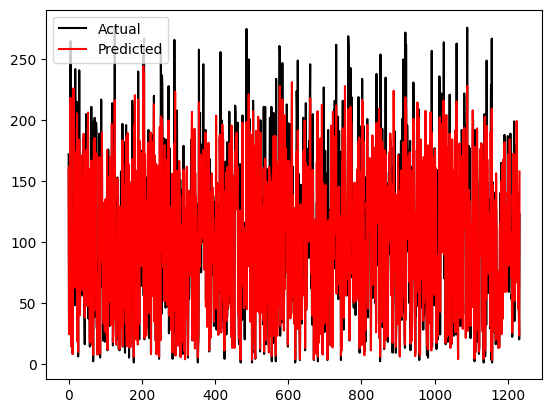

In [21]:
plt.plot(y_test,c='k',label='Actual')
plt.plot(forest_pred,c='red',label='Predicted')
plt.legend()
plt.show()

In [22]:
forest_model = pickle.load(open('forest_regression.sav', 'rb'))

In [23]:
df_test = pd.read_csv(test_file, sep=" ",header=None)
df_test.drop(columns=[26,27],inplace=True)
df_test.columns = columns
df_test.head()

,Section-0,Section-1,Section-2,Section-3,Section-4,Section-5,Section-6,Section-7,Section-8,Section-9,...,Section-16,Section-17,Section-18,Section-19,Section-20,Section-21,Section-22,Section-23,Section-24,Section-25
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [24]:
df_rul = pd.read_csv(RUL_file, names=['rul'])
df_rul.head()

,rul
0,112
1,98
2,69
3,82
4,91


In [25]:
RUL_name = ["Section-1"]
RUL_data = df_test[RUL_name]
MachineID_series = df_test["Section-0"]
grp = RUL_data.groupby(MachineID_series)
max_cycles = np.array([max(grp.get_group(i)["Section-1"]) for i in MachineID_series.unique()])
max_cycles

array([ 31,  49, 126, 106,  98, 105, 160, 166,  55, 192,  83, 217, 195,
        46,  76, 113, 165, 133, 135, 184, 148,  39, 130, 186,  48,  76,
       140, 158, 171, 143, 196, 145,  50, 203, 198, 126, 121, 125,  37,
       133, 123, 156, 172,  54, 152, 146,  73,  78, 303,  74, 144, 189,
       164, 121, 113, 136, 160, 176,  94, 147, 159, 232, 155, 168,  71,
       147,  71, 187,  54, 152,  68, 131, 112, 137,  88, 205, 162,  72,
       101, 133, 213, 162,  73, 172,  34, 110,  56,  68, 177, 146, 234,
       150, 244, 133,  89,  97, 134, 121,  97, 198])

In [26]:
df_test.drop(df_test[["Section-0",
                "Section-4", # Operatinal Setting
                "Section-5", # Sensor data
                "Section-9", # Sensor data
                "Section-10", # Sensor data
                "Section-14",# Sensor data
                "Section-20",# Sensor data
                "Section-22",# Sensor data
                "Section-23"]], axis=1 , inplace=True)
#df_test = df_test.groupby(["Section-0"])
#print(df_test)


In [27]:
gen = MinMaxScaler(feature_range=(0, 1))
df_test = gen.fit_transform(df_test)
df_test = pd.DataFrame(df_test)
#df_test = df_test.rolling(20).mean()
pt = PowerTransformer()
df_test = pt.fit_transform(df_test)
df_test=np.nan_to_num(df_test)

df_test

array([[-1.7938502 ,  1.04936462,  1.00459956, ..., -0.43585161,
        -0.26636316,  0.42059548],
       [-1.75983242, -1.22056415, -1.03515135, ...,  0.37849296,
         0.89958112,  0.64708667],
       [-1.72609272,  0.14086219,  0.34489676, ...,  0.37849296,
         1.36106153,  0.96601877],
       ...,
       [ 1.83603259, -0.26773967, -1.03515135, ...,  1.88097691,
        -1.83688401, -1.50936271],
       [ 1.84590292, -1.71931856,  0.34489676, ...,  1.88097691,
        -1.5901386 , -0.80455247],
       [ 1.85572407,  0.59502963,  1.00459956, ...,  2.57907106,
        -1.33736328, -1.7132478 ]])

In [28]:
forest_pred = forest_model.predict(df_test)

forest_pred = np.array(forest_pred)

forest_pred = forest_pred.flatten()

forest_pred = forest_pred.reshape(forest_pred.shape[0],1)

forest_pred.shape

forest_pred

array([[191.58],
       [189.65],
       [174.71],
       ...,
       [ 20.97],
       [ 14.89],
       [  5.98]])

In [29]:
final_forest_pred = []
count = 0
for i in range(100):
    temp = 0
    j = max_cycles[i]
    while j>0:
        temp = temp + forest_pred[count]
        j=j-1
        count=count+1
    final_forest_pred.append(temp/max_cycles[i])

In [30]:
final_forest_pred=np.array(final_forest_pred)
final_forest_pred = final_forest_pred.flatten()

In [31]:
final_forest_pred[0]

169.42000000000004

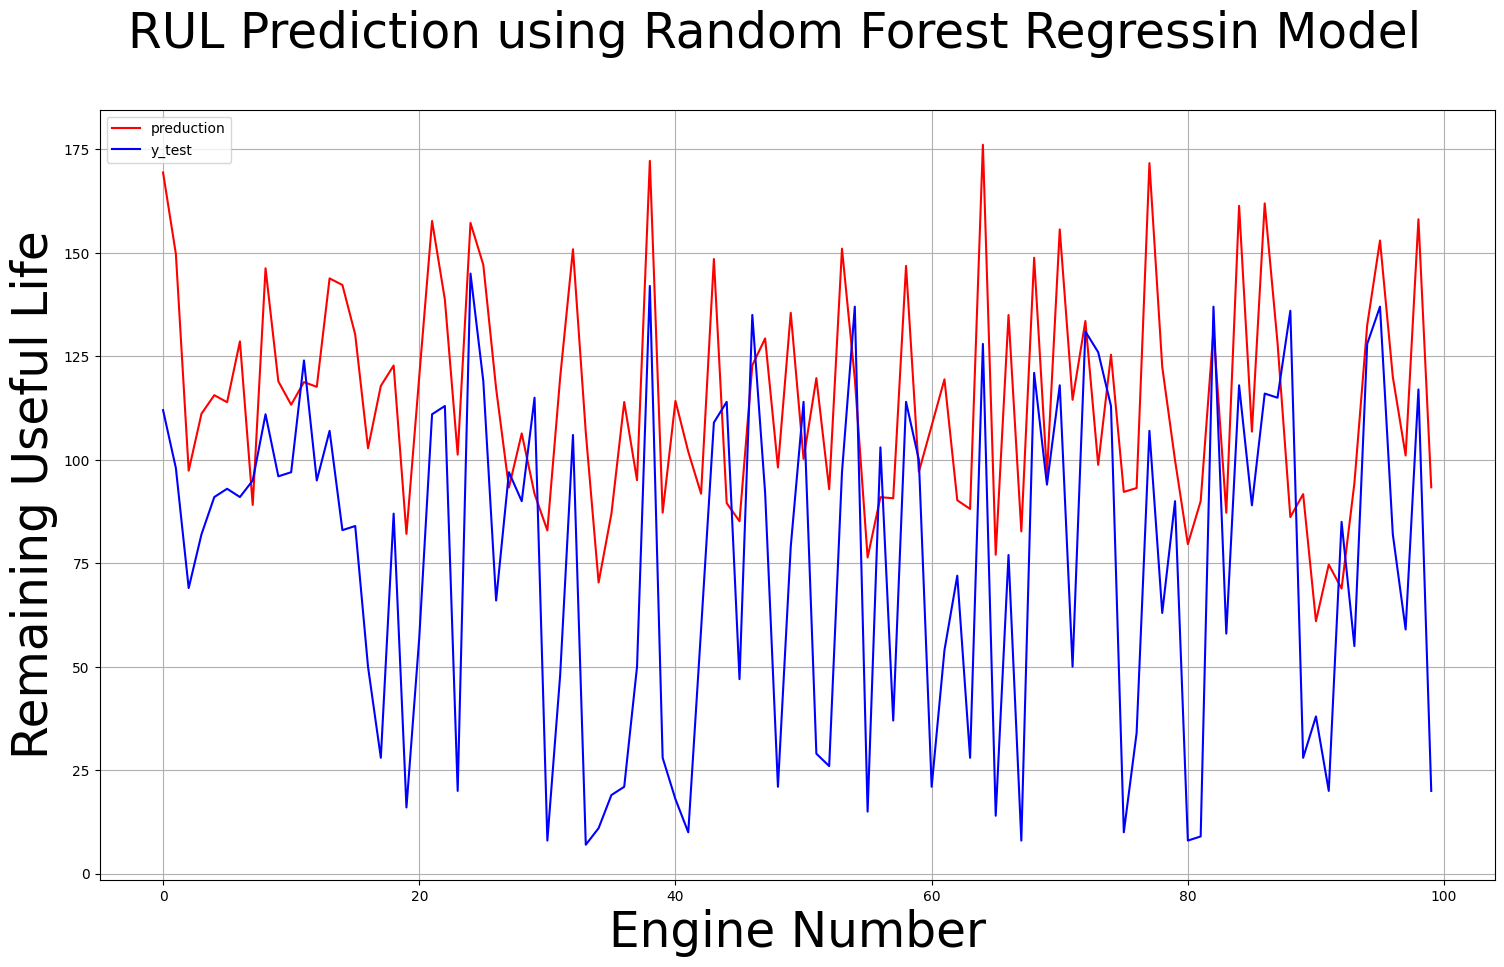

In [32]:
fig = plt.figure(figsize=(18,10))
plt.plot(final_forest_pred,c='red',label='preduction')
plt.plot(df_rul,c='blue',label='y_test')

fig.suptitle('RUL Prediction using Random Forest Regressin Model', fontsize=35)
plt.xlabel("Engine Number", fontsize=35)
plt.ylabel("Remaining Useful Life", fontsize=35)

plt.legend(loc='upper left')
plt.grid()
plt.show()

In [33]:
def scoring_function(actual,predicted):
    d = []
    for i in range(len(predicted)):
        d.append((predicted[i] - actual[i]))
    scores = []
    for i in range(len(d)):
        if d[i] >= 0:
            scores.append(math.exp(d[i]/10) - 1)
        else :
            scores.append(math.exp((-1*d[i])/13) - 1)
    return sum(scores)


print("mean_squared_error >> ", mean_squared_error(df_rul,final_forest_pred))
print("root mean_absolute_error >>",math.sqrt(mean_squared_error(df_rul,final_forest_pred)))
print("mean_absolute_error >>",mean_absolute_error(df_rul,final_forest_pred))
print("scoring function >>",scoring_function(np.array(df_rul),final_forest_pred))

mean_squared_error >>  2529.6842386174035
root mean_absolute_error >> 50.295966424927194
mean_absolute_error >> 43.490271949383434
scoring function >> 112714.36810384005
